* Como espero ordenar los iteradores:

Tengo 3 usuarios que van a correr en paralelo:

Van a tener un tiempo de espera de forma que se distribuyan los momento de consultas

t = 60/3 = 20 min

* Como guardo los iteradores?

Guardarlos todos en el mismo lugar,

por otro lado guardo txt con el iterador mas actual (sumar el nombre el canal!!)

guardar en ese mismo txt info básica de los datos del canal:

numero de publicaciones, rango de fechas pertecientes a la publicacion

In [1]:
import instaloader

In [6]:
login_user = 'oscar_pkong'
target_user = 'diario.ole'

In [3]:
bot = instaloader.Instaloader()

In [4]:
bot.load_session_from_file(login_user)

Loaded session from C:\Users\54911\AppData\Local\Instaloader\session-oscar_pkong.


In [7]:
perfil = instaloader.Profile.from_username(bot.context, target_user)

In [8]:
bot.close()

In [5]:
nombre_json = 'main\iteradores\infobae2023-08-27 22-36-10_Iterador_congelado.json'

In [6]:
publicaciones_aux = instaloader.load_structure_from_file(bot.context,nombre_json)

In [8]:
nombre ='main\iteradores\ordenando\infobae2023-08-27 22-36-10_Iterador_congelado.json'
instaloader.save_structure_to_file(publicaciones_aux,nombre)

In [3]:
!dir

 El volumen de la unidad C es Windows
 El n�mero de serie del volumen es: 9AF1-5DCD

 Directorio de c:\Users\54911\OneDrive\Escritorio\Data Science\Elecciones + IA\getting_data\instagram

28/08/2023  21:55    <DIR>          .
31/08/2023  18:43    <DIR>          ..
08/08/2023  20:04               321 atributos_metodos_instaloader.txt
10/08/2023  21:39             6.294 debbuging.py
15/08/2023  19:25    <DIR>          infobae
31/08/2023  20:42    <DIR>          main
29/08/2023  19:52            87.493 scrapping_insta.ipynb
               3 archivos         94.108 bytes
               4 dirs  18.222.579.712 bytes libres


In [4]:
# python script showing battery details
import psutil

# function returning time in hh:mm:ss
def convertTime(seconds):
	minutes, seconds = divmod(seconds, 60)
	hours, minutes = divmod(minutes, 60)
	return "%d:%02d:%02d" % (hours, minutes, seconds)

# returns a tuple
battery = psutil.sensors_battery()

print("Battery percentage : ", battery.percent)
print("Power plugged in : ", battery.power_plugged)

# converting seconds to hh:mm:ss
print("Battery left : ", convertTime(battery.secsleft))


Battery percentage :  99
Power plugged in :  False
Battery left :  1193046:28:15


Revisando los datos

In [16]:
data = []
import ast

In [35]:
with open('main\data\infobae_info_recolectada.txt','r',encoding='utf-8') as file:
    for line in file:
        data.append(line)

In [36]:
type(data[0])

tuple

In [22]:
data[0][data[0].index(':')+2 :-3]

ValueError: tuple.index(x): x not in tuple

In [57]:
caption = ""

In [61]:
caption.join(value[:-3])

"['DANIELA DE GRAN HERMANO ANUNCIÓ SU EMBARAZO 🐣 🤰🏻\\nDespués de muchos rumoresfinalmente Daniela Celis confirmó en el ciclo de streaming que participa junto a sus ex compañeros que está embarazada de gemelos.\\n🗣 “Resulta ser que no me encontré con unome encontré con dos” dijo la ex hermanita mientras sus amigos festejaban a los gritos la feliz noticia.\\n\\n📌 Más detalles en @infobae -link en bio-'"

In [47]:
value = data[0][data[0].index(':')+2 :-3].split(', ')
likes = value[-3]
canal = value[-2]
dia = value[-1]
value

["['DANIELA DE GRAN HERMANO ANUNCIÓ SU EMBARAZO 🐣 🤰🏻\\nDespués de muchos rumores",
 'finalmente Daniela Celis confirmó en el ciclo de streaming que participa junto a sus ex compañeros que está embarazada de gemelos.\\n🗣 “Resulta ser que no me encontré con uno',
 "me encontré con dos” dijo la ex hermanita mientras sus amigos festejaban a los gritos la feliz noticia.\\n\\n📌 Más detalles en @infobae -link en bio-'",
 '5607',
 "'infobae'",
 "'2023-08-24 23-33-14']"]

In [33]:
data[0].split(':')[0][2:-1]

'CwWI36nSXFo'

Quiero obtener la ultima linea del txt para obtener la fecha y la cantidad de publicaciones

In [2]:
def ultimaLinea(directorio):
    with open(directorio,'r',encoding='utf-8') as file:
        count = 0
        for line in file:
            count+=1
        
    return count, line

In [10]:
dir1='main\data\infobae_info_recolectada.txt'
dir2 = 'main\data\info_recolectada.txt'

In [11]:
cantidad_1, last_pub_1 = ultimaLinea(dir1)
cantidad_2, last_pub_2 = ultimaLinea(dir2)

In [58]:
import datetime

In [89]:
def dia_pub(pub):
    # de str a dict
    if type(pub) == str:
        values = pub[pub.index(':')+2 :-3]
        clave = pub.split(':')[0][2:-1]

        value = values.split(', ')
        likes = value[-3]
        canal = value[-2][1:-1]
        dia = value[-1][1:-2]
    elif type(pub) == tuple:
        print('Es una tupla xd')
        
    #return {clave:[canal,dia,likes] }
    return dia

In [90]:
dia_pub(last_pub_2)

'2023-06-19 07-11-18'

In [91]:
dia_pub(last_pub_1)

'2021-07-15 01-56-22'

eliminando iteradores extra

In [92]:
import os

In [93]:
path = 'main\infobae2023-08-28 11-51-49_Iterador_congelado.json'

In [94]:
os.path.exists(path)

True

In [95]:
os.remove(path)

CUIDADO QUE LO BORRA DEL DISCO DURO !

Quiza conviene moverlos a una carpeta por si acaso


In [101]:
import pathlib

In [104]:
pathlib.Path('main\infobae2023-08-28 09-44-43_Iterador_congelado.json').rename('main/iteradores/infobae2023-08-28 09-44-43_Iterador_congelado.json')

WindowsPath('main/iteradores/infobae2023-08-28 09-44-43_Iterador_congelado.json')

habria que mover todo menos el mas reciente

In [139]:
lista_json = glob.glob('main/*.json')

podriamos leer el cual es el ultimo guardado, mover todo menos ese

In [118]:
def leer_txt(dir):
    with open(dir,'r',encoding='utf-8') as f:
        texto = f.read()
    return texto

In [141]:
last_one = 'main\\'+leer_txt('main/nombre_json.txt')

In [140]:
len(lista_json)

29

In [142]:
lista_json.remove(last_one)

In [143]:
len(lista_json)

28

creemos la funcion


In [146]:
def mover_iteradores(dir_viejo):
    dir_new = dir_viejo[:4]+'/'+'iteradores/'+dir_viejo.split('/')[-1]
    pathlib.Path('main\infobae2023-08-28 09-44-43_Iterador_congelado.json').rename('main/iteradores/infobae2023-08-28 09-44-43_Iterador_congelado.json')

In [144]:
def mover_iteradores_viejos():
    last_one = 'main\\'+leer_txt('main/nombre_json.txt')
    lista_json = glob.glob('main/*.json')
    lista_json.remove(last_one)

    for elem in lista_json:
        mover_iteradores(elem)

Busquemos todos aquello que no nos interesa

Importando librerias

In [105]:
import instaloader
import glob
import datetime
import json

Uso basico de la libreria instaloader

In [72]:
def info_basica (user_name): 
    bot = instaloader.Instaloader()
    profile = instaloader.Profile.from_username(bot.context, user_name)
    print("Username: ", profile.username)
    print("User ID: ", profile.userid)
    print("Number of Posts: ", profile.mediacount)
    print("Followers Count: ", profile.followers)
    print("Following Count: ", profile.followees)
    print("Bio: ", profile.biography)
    print("External URL: ", profile.external_url)

In [18]:
bot = instaloader.Instaloader()

Iniciando sesion 

In [20]:
bot.load_session_from_file('oscarrcitolopez.py')

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\users\\54911\\appdata\\local\\temp/.instaloader-54911/session-oscarrcitolopez.py'

In [21]:
bot.close()

In [24]:
bot.context.is_logged_in

True

In [23]:
bot.load_session_from_file('oscar_ds.py')

Loaded session from C:\Users\54911\AppData\Local\Instaloader\session-oscar_ds.py.


In [24]:
bot.close()

In [25]:
bot.context.is_logged_in

True

Obtenemos los comentarios y los me gustas dada una publicacion

In [5]:
publicacion = instaloader.Post.from_shortcode(bot.context,'CvwvjNZNNax')
# comentarios = publicacion.get_comments()
# me_gusta = publicacion.get_likes()

In [27]:
def guardar_info(post,contador):
    descripcion =post.caption
    usuario=post.owner_username
    likes = post.likes
    dia = post.date
    id=post.shortcode
    publicaciones = {id:[descripcion,likes,usuario,dia]}
    with open('info_recolectada.txt','a',encoding='utf-8') as f:
        f.write(str(publicaciones)+', ')
    return contador + 5

In [38]:
guardar_info(publicacion,count)

15

In [24]:
count = 10

In [39]:
with open('info_recolectada.txt','r',encoding='utf-8') as f:
    data = f.read()


In [40]:
len(data)

1150

In [78]:
contador = 0
# for like in me_gusta:
#     if contador < 10:
#         print(like)
#     else:
#         break
#     contador +=1

In [79]:
contador = 0
# for comment in comentarios:
#     if contador < 10:
#         print(comment)
#     else:
#         break
#     contador +=1

Funcion para guardar publicaciones dentro de una periodo determinado

Funcion que obtiene todas las descripciones dentro periodo de tiempo dado un usuario

In [80]:
usuario = 'infobae'
# infobae = instaloader.Profile.from_username(bot.context, 'infobae')
# publicaciones_infobae = infobae.get_posts()

In [81]:
import datetime
ids = []
captions = []
desde = datetime(2023, 8, 1) 
hasta = datetime(2023, 8, 10) 
MAX_ITERR = 100
contador = 0
# for post in publicaciones_infobae:
#     fecha = post.date
#     if (fecha > desde) and (fecha < hasta) and contador<MAX_ITERR:
#         ids.append(post.shortcode)
#         captions.append(post.caption)
#     print(fecha, contador)
#     contador +=1

NameError: name 'datetime' is not defined

In [ ]:
print("Followers Count: ", infobae.followers)
print("Following Count: ", infobae.followees)

Followers Count:  2613640
Following Count:  7


Otra propuesta:

Analizar la distribucion de palabras de las descripcion de las publicaciones:
 
* Sacar articulos, preposiciones

In [3]:
dir_captions = []
for dirs in glob.glob('infobae/*.txt'):
    dir_captions.append(dirs)

In [6]:
import re
def sinEmoji(line):
    # https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', line)

In [4]:
def cantidadPalabras(directorios):
    result = dict()
    for dir_caption in directorios:
        with open(dir_caption,encoding="utf8") as f:
            for line in f:
                palabras = line.split(" ")
                for palabra in palabras:
                    palabra = sinEmoji(palabra)
                    if palabra in result.keys():
                        result[palabra] +=1
                    else:
                        result[palabra] =1

    
    return result

In [7]:
distribucion = cantidadPalabras(dir_captions)

In [10]:
import seaborn as sns
import pandas as pd

In [11]:
distribucion_pd = pd.DataFrame(list(distribucion.items()),columns = ['Palabra', 'Cantidad'])

In [13]:
distribucion_pd.sort_values(by='Cantidad',inplace=True)

In [40]:
mas_de_una_sola_aparicion = distribucion_pd[distribucion_pd['Cantidad']>1]['Palabra'].to_list()

In [29]:
una_sola_aparicion = distribucion_pd[distribucion_pd['Cantidad']==1]['Palabra'].to_list()


In [37]:
def LaPalabraEsPolitico(palabra):
    if (palabra in palabras_politicas) or (palabra in apellidos_influyentes):
        return True
    else :
        return False

In [38]:
verdad = dict()
verdad['verdadero'] = 0
verdad['falso'] = 0
for word in una_sola_aparicion:
    if LaPalabraEsPolitico(word):
        verdad['verdadero'] += 1
    else:
        verdad['falso'] += 1

In [41]:
mas_de_una_sola_aparicion
verdad = dict()
verdad['verdadero'] = 0
verdad['falso'] = 0
for word in mas_de_una_sola_aparicion:
    if LaPalabraEsPolitico(word):
        verdad['verdadero'] += 1
    else:
        verdad['falso'] += 1

# Scraping using BeautifulSoup

In [1]:
from bs4 import BeautifulSoup
import requests

In [ ]:
publicaciones_politicas = set()
publicaciones_politica_apellido = set()
publicaciones_politicas_palabra = set()

for palabra in apellidos_influyentes:
    publicaciones_politica_apellido = publicaciones_politica_apellido.union(buscar_Palabra(palabra, dir_captions))
for palabra in palabras_politicas:
    publicaciones_politicas_palabra = publicaciones_politicas_palabra.union(buscar_Palabra(palabra, dir_captions))

dir_publicaciones_politicas = publicaciones_politica_apellido.union(publicaciones_politicas_palabra)
   

In [ ]:
short_codes = []
for pub_politics in dir_publicaciones_politicas:
    short_codes.append(devolver_shortCode(pub_politics))

Canales de noticias:
infobae
TN
Clarin
La nacion
Minuto Uno
Filonews
Olé
TV publica
Pagina 12 
C5N
A24
Canal 26
El nueve

In [7]:
Canales_de_noticias_instagram = {
    'infobae' : 'infobae',
    'TN' : 'todonoticias',
    'Clarin' : 'clarincom',
    'La_nacion' : 'lanacioncom',
    'Minuto_uno' : 'minutouno',
    'Filonews' : 'filonewsok',
    'Ole' : 'diario.ole',
    'TVpublica' : 'tv_publica',
    'Pagina12' : 'pagina12',
    'C5N' : 'c5n',
    'A24' : 'a24noticias',
    'Canal26' : 'canal26',
    'Canal9' : 'canal9oficial'
}

In [8]:
canales = list(Canales_de_noticias_instagram.values())


In [12]:
info_canales = dict()

Recolectemos la cantidad de publicaciones de cada canal y la cantidad de seguidores

In [70]:
info_canales_tuple = list(zip(list(info_canales.keys()),list(info_canales.values())))

In [73]:
canales_cant_seguidores = sorted(info_canales_tuple, key=lambda tup: tup[1][0])
canales_cant_publicaciones = sorted(info_canales_tuple, key=lambda tup: tup[1][1])

In [85]:
cant_publicaciones_c = list(zip(*list(zip(*canales_cant_publicaciones))[1]))[1]
cant_seguidores = list(zip(*list(zip(*canales_cant_seguidores))[1]))[0]

In [79]:
labels_cant_seguidores = list(zip(*canales_cant_seguidores))[0]
labels_cant_publicaciones = list(zip(*canales_cant_publicaciones))[0]

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'Cantidad de seguidores')

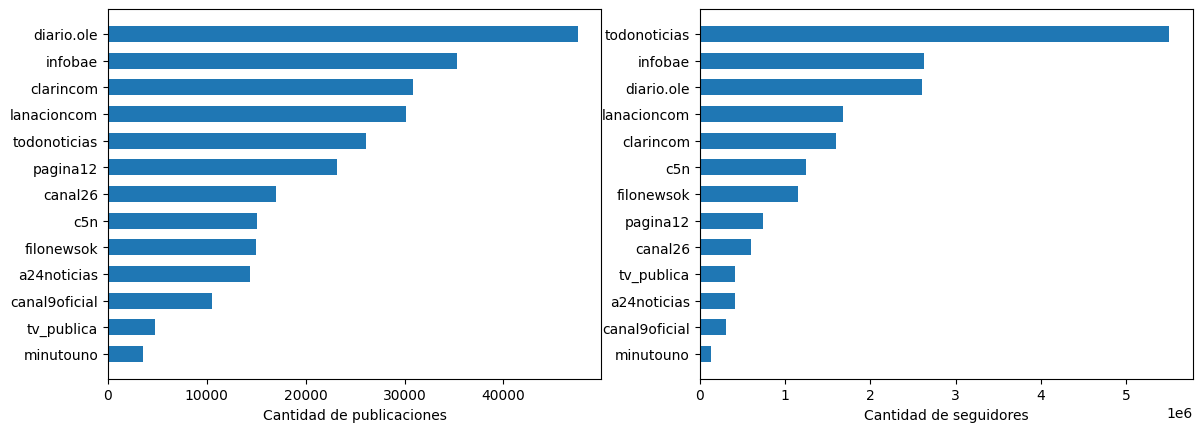

In [86]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(14)
axs[0].barh(labels_cant_publicaciones,cant_publicaciones_c,0.6)
axs[0].set_xlabel('Cantidad de publicaciones')
axs[1].barh(labels_cant_seguidores,cant_seguidores,0.6)
axs[1].set_xlabel('Cantidad de seguidores')

In [15]:
from time import sleep

In [16]:

for canal in canales:
    try:
        perfil = instaloader.Profile.from_username(bot.context, canal)
        seguidores = perfil.followers
        cant_publicaciones = perfil.mediacount
        count += 1
        info_canales[canal] = (seguidores, cant_publicaciones)
        sleep(1)
    except instaloader.exceptions.AbortDownloadException:
        info_canales[canal] = (0, 0)
        count += 1

In [89]:
perfil_1 = instaloader.Profile.from_username(bot.context, canales[2])
perfil_1.mediacount

30805

In [14]:
def esPolitico(descripcion):
    razon = []
    for palabra in descripcion:
        if (palabra in palabras_politicas) or (palabra in apellidos_influyentes):
            razon.append(palabra)
    
    if (len(razon) == 0):
        return (False,razon)
    else :
        return (True,razon)

In [1]:
# cant_likes = []
# palabras = []
# contador = 0
# try:

#     for post in publicaciones:
#         pregunta = esPolitico(post.caption)
#         print(contador)
#         if pregunta[0]:
#             palabras.append(pregunta[1])
#             cant_likes.append(post.likes)
#         contador +=1

# except instaloader.exceptions.ConnectionException:
#     congelado = publicaciones.freeze()
#     instaloader.save_structure_to_file(congelado,'Iterador_congelado.json')